In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def hinf(V):
    return  1.0/(1+np.exp(-(V--45)/-7))
def tauh(V):
    return 0.1 + 0.75*(1.0/(1+np.exp(-(V--40.5)/-6)))
def Hinf(V):
    return 1./(1. + np.exp((V + 84.)/10.2))
def tauH(V):
    return  1./(np.exp(-17.9 - 0.116*V ) + np.exp(-1.84 + 0.09*V )) + 0.1


In [95]:
def simulator_HH():
    gKir = 10
    Ek = -90
    Gl = 0.01
    El = -70
    Gh = 2
    Eh = -32.9 #32.9
    dt = 0.01
    t = np.arange(0,10000,.01)
    V = np.zeros(len(t))
    h = np.zeros(len(t))
    H = np.zeros(len(t))

    I = np.zeros(len(t))
    I[0:100] = 100
    V[0] = -80
    for j in range(len(t)-1):
        k1V = -Gl * (V[j] - El) - gKir * h[j] * (V[j] - Ek) - Gh * H[j] * (V[j] - Eh) + I[j]
        k1h = (hinf(V[j]) - h[j]) / tauh(V[j])
        k1H = (Hinf(V[j]) - H[j]) / tauH(V[j])

        av = V[j] + k1V * dt
        ah = h[j] + k1h * dt
        aH = H[j] + k1H * dt 

        k2V = -Gl * (av - El) - gKir * ah * (av - Ek) - Gh * aH * (av - Eh) + I[j]
        k2h = (hinf(av) - ah) / tauh(av)
        k2H = (Hinf(av) - aH) / tauH(av)

        V[j+1] = V[j] + (k1V + k2V) * dt / 2
        h[j+1] = h[j] + (k1h + k2h) * dt / 2
        H[j+1] = H[j] + (k1H + k2H) * dt / 2

    return np.array(V).reshape(-1,1),np.array(h).reshape(-1,1)

ValueError: x and y must have same first dimension, but have shapes (1000000, 1) and (1, 1)

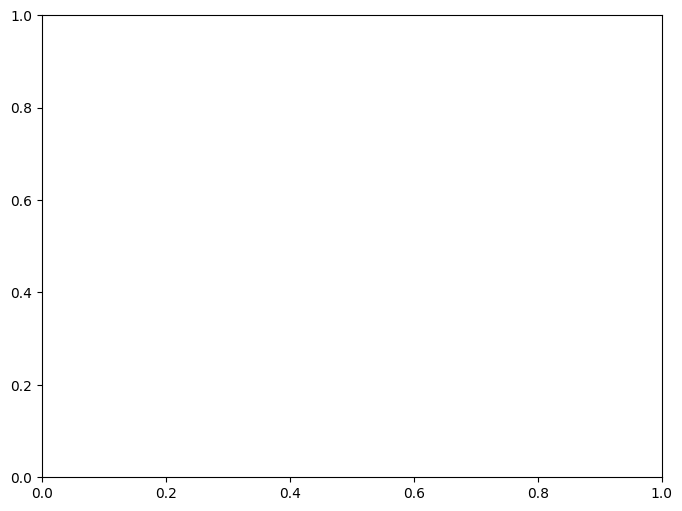

In [96]:

V, h = simulator_HH()

plt.figure(figsize=(8, 6))
plt.plot(V, h, color='b')
plt.xlabel('Membrane potential V (mV)')
plt.ylabel('Gating variable h')
plt.title('Phase Plane: V vs h')
plt.grid(True)
plt.show()

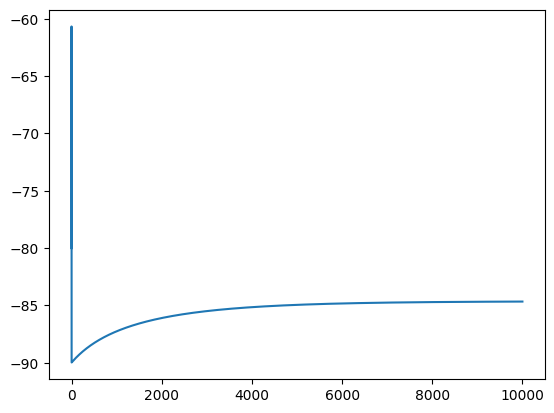

In [94]:
t = np.arange(0,10000,.01)
voltage,h = simulator_HH()
plt.plot(t, voltage)

In [69]:
def simulator_IF():
    gKir = 10
    Ek = -90
    Gl = 0.01
    El = -70
    Gh = 200
    Eh = -32.9 #32.9
    dt = 0.01
    cm = 1
    t = np.arange(0,1000,.01)
    V = np.zeros(len(t))
    h = np.zeros(len(t))
    H = np.zeros(len(t))

    I = np.zeros(len(t))
    I[0:100] = 100
    V[0] = -65
    for j in range(len(t)-1):
        k1V = (-Gl * (V[j] - El) - gKir * h[j] * (V[j] - Ek) - Gh * H[j] * (V[j] - Eh) + I[j])/cm
        k1h = (hinf(V[j]) - h[j]) / tauh(V[j])
        k1H = (Hinf(V[j]) - H[j]) / tauH(V[j])

        av = V[j] + k1V * dt
        ah = h[j] + k1h * dt
        aH = H[j] + k1H * dt 

        k2V = (-Gl * (av - El) - gKir * ah * (av - Ek) - Gh * aH * (av - Eh) + I[j])/cm
        k2h = (hinf(av) - ah) / tauh(av)
        k2H = (Hinf(av) - aH) / tauH(av)

        V[j+1] = V[j] + (k1V + k2V) * dt / 2
        h[j+1] = h[j] + (k1h + k2h) * dt / 2
        H[j+1] = H[j] + (k1H + k2H) * dt / 2

        if V[j] > -65:
            V[j] = 20
            V[j+1] = -80

    return np.array(V).reshape(-1,1),np.array(h).reshape(-1,1),np.array(H).reshape(-1,1)

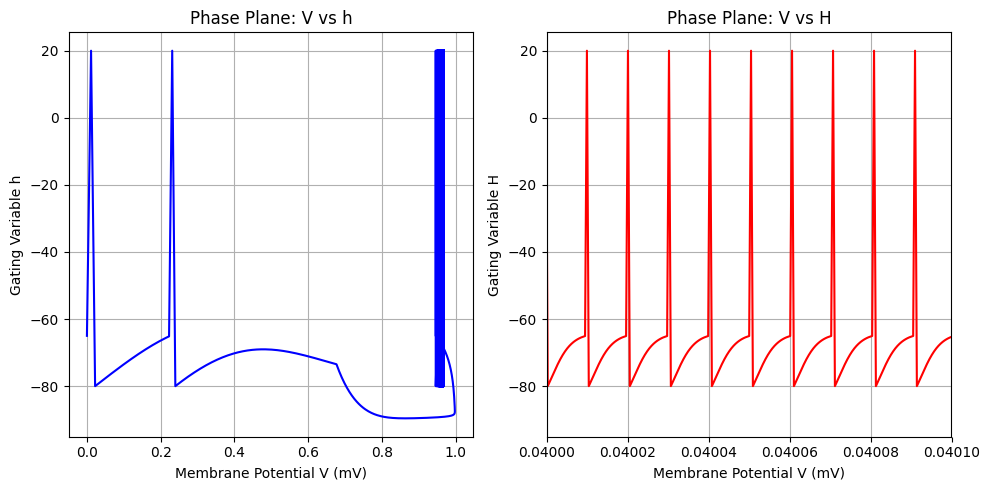

In [75]:

V, h, H = simulator_IF()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(h,V, color='b')
plt.xlabel('Membrane Potential V (mV)')
plt.ylabel('Gating Variable h')
plt.title('Phase Plane: V vs h')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(H,V, color='r')
plt.xlabel('Membrane Potential V (mV)')
plt.ylabel('Gating Variable H')
plt.title('Phase Plane: V vs H')
plt.grid(True)
plt.xlim(0.04,0.0401)

plt.tight_layout()
plt.show()

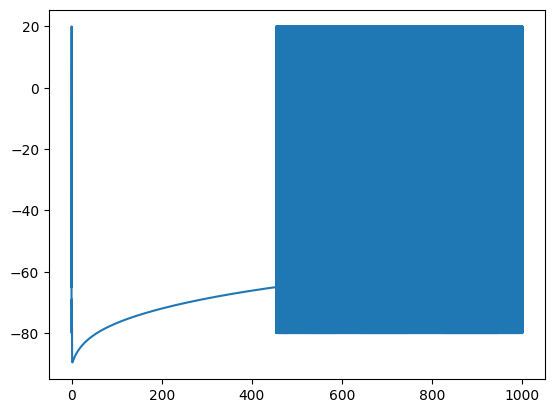

In [71]:
t = np.arange(0,1000,.01)
V, h, H = simulator_IF()
plt.plot(t, V)
#plt.xlim(450,460)